<div align="center" style="color:red;font-size:20px">Clustering city based on living style using Hierarchical clustering</div>

### Task1

In [ ]:
#importing datasets and libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import scipy.cluster.hierarchy as sch #for plotting dendogram
from sklearn.cluster import AgglomerativeClustering

In [20]:
#importing all datasets
world_city=pd.read_csv("DS2_C6_S2_WorldCities_Data_Practice.csv")
city=pd.read_csv("DS2_C6_S2_Cities_Data_Practice.csv")
cost=pd.read_csv("DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv")
quality=pd.read_csv("DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv")

In [21]:
world_city.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [22]:
city.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [23]:
cost.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [24]:
quality.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


### TASK2

In [25]:
#renaming for easy merging
world_city.rename(columns={"city":"City"},inplace=True)

In [26]:
world_city.sort_values("population",ascending=False,inplace=True)

In [27]:
#dropping duplicates keeping only first by city
world_city.drop_duplicates(subset=["City"],keep="first",inplace=True)

In [28]:
#merging all datasets wrt common column City

In [29]:
m1=world_city.merge(right=city,on="City")
m2=m1.merge(cost,on="City")
df=m2.merge(quality,on="City")

In [30]:
#dropping unnecessary columns for clustering
df.drop(["city_ascii","iso2","iso3","admin_name","id","Country","capital"],axis=1,inplace=True)

In [31]:
df.head()

,City,lat,lng,country,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Tokyo,35.6897,139.6922,Japan,37977000.0,2.30,11.80,8.52,0.98,1967.31,2065.67,80.00,47.57,71.53,30.54,69.29,13.91
1,Jakarta,-6.2146,106.8451,Indonesia,34540000.0,1.88,3.37,16.83,0.45,807.70,336.54,69.15,17.38,38.33,57.91,15.66,48.27
2,Delhi,28.6600,77.2300,India,29617000.0,0.84,2.41,7.24,0.84,362.03,362.03,77.12,34.39,74.99,73.03,42.45,52.56
3,Mumbai,18.9667,72.8333,India,23355000.0,0.84,3.02,6.03,0.89,603.39,337.90,77.13,28.83,58.41,70.49,26.43,34.63
4,Manila,14.5958,120.9772,Philippines,23088000.0,1.58,2.77,4.75,0.86,791.68,221.67,68.31,14.80,80.56,65.22,13.14,66.36


In [32]:
dfc=df.copy()

In [33]:
df.shape

(189, 17)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   189 non-null    object 
 1   lat                    189 non-null    float64
 2   lng                    189 non-null    float64
 3   country                189 non-null    object 
 4   population             189 non-null    float64
 5   Cappuccino             189 non-null    float64
 6   Cinema                 189 non-null    float64
 7   Wine                   189 non-null    float64
 8   Gasoline               189 non-null    float64
 9   Avg Rent               189 non-null    float64
 10  Avg Disposable Income  189 non-null    float64
 11  Movehub Rating         189 non-null    float64
 12  Purchase Power         189 non-null    float64
 13  Health Care            189 non-null    float64
 14  Pollution              189 non-null    float64
 15  Qualit

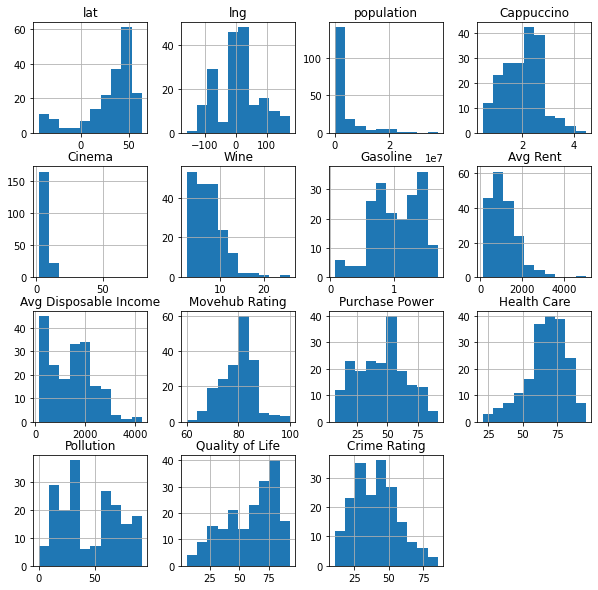

In [35]:
#checking distribution of numerical columns
df.hist(figsize=(10,10))
plt.show()

In [36]:
#scaling dataset using min max scaler
df1=df.iloc[:,4:]
scaler=MinMaxScaler()
dfs=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)

In [37]:
dfs.head()

,population,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,1.000000,0.457711,0.128605,0.266028,0.565217,0.374446,0.469189,0.501496,0.481923,0.674830,0.330448,0.729262,0.040754
1,0.909478,0.353234,0.020082,0.611990,0.236025,0.139309,0.052072,0.231057,0.128700,0.232930,0.626596,0.118163,0.499866
2,0.779818,0.094527,0.007724,0.212739,0.478261,0.048939,0.058221,0.429711,0.327717,0.720884,0.790197,0.423428,0.557189
3,0.614893,0.094527,0.015577,0.162365,0.509317,0.097880,0.052400,0.429960,0.262665,0.500200,0.762714,0.240884,0.317611
4,0.607861,0.278607,0.012358,0.109076,0.490683,0.136060,0.024362,0.210120,0.098514,0.795022,0.705691,0.089448,0.741582


### Task3

In [38]:
#Agglomerative hierarchical model building with only two features
dfm=dfs[["Avg Rent","Quality of Life"]]

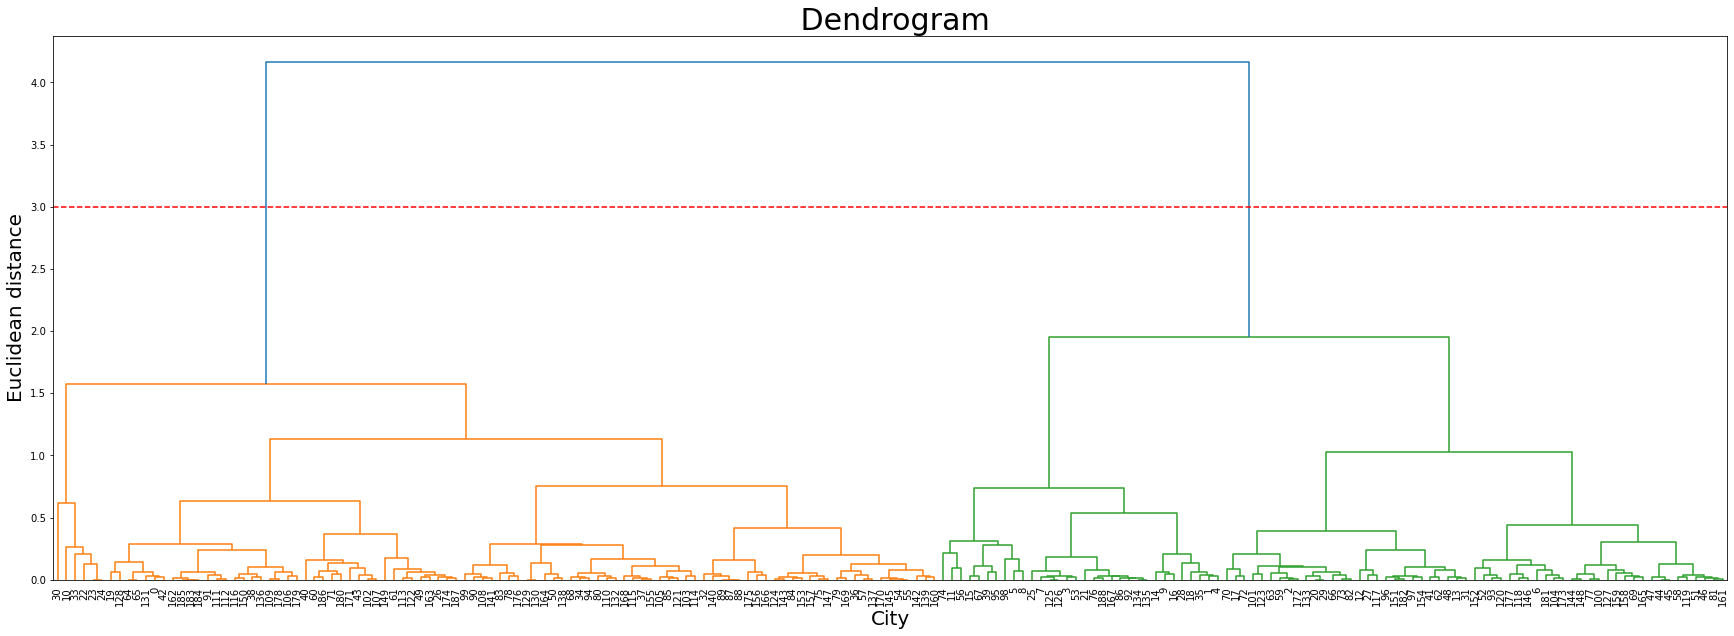

In [43]:
#using dendrogram to find number of clusters 
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfm, method = 'ward'))
ax = plt.gca()
plt.axhline(y=3, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('City',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [ ]:
#from above dendrogram it is seen that n_clusters =2 since longest line without horizontal cutting is seen at at red line drawn

In [44]:
model1=AgglomerativeClustering(n_clusters=2,affinity='euclidean').fit(dfm)

In [46]:
model1.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

### Task4

In [ ]:
#Building model with all features

In [47]:
#first lets find n_clusters using dendogram

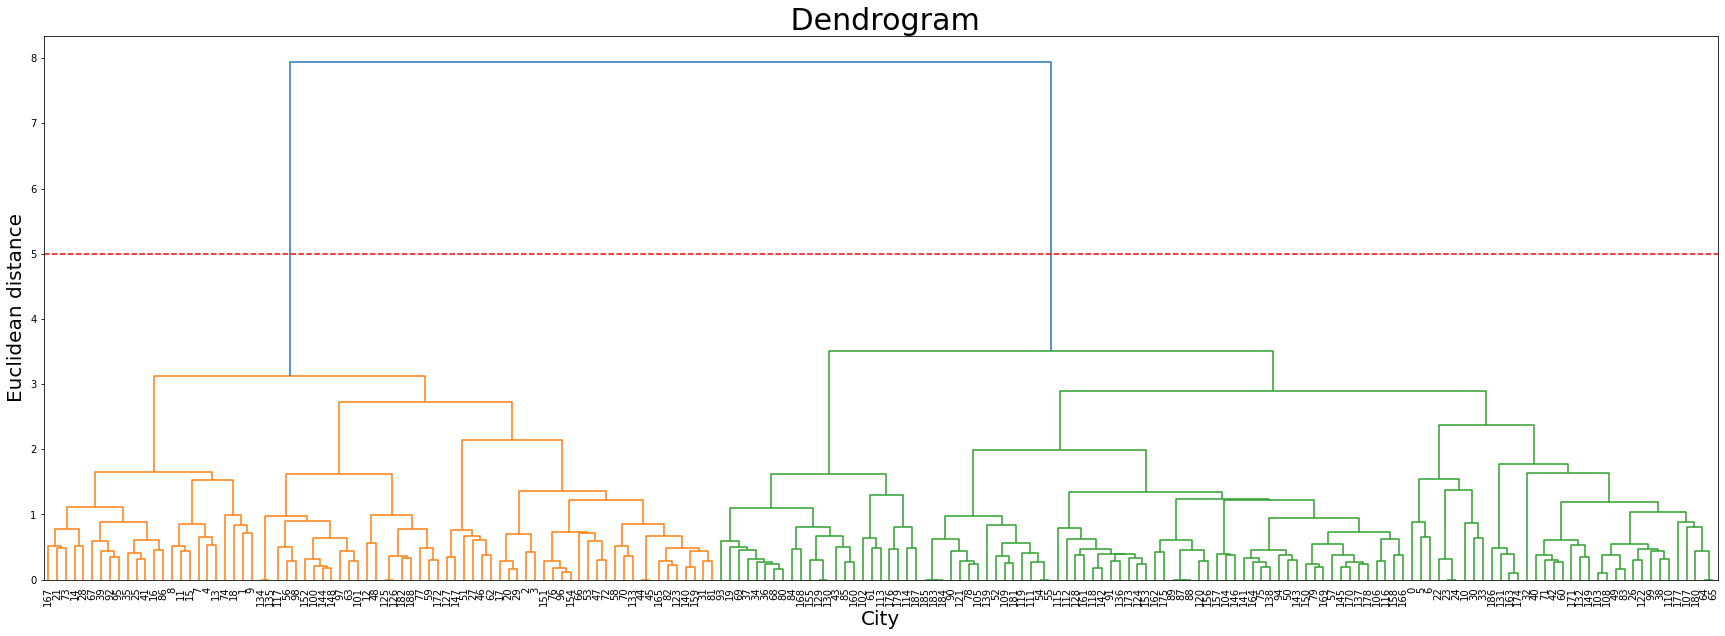

In [49]:
#using dendrogram to find number of clusters 
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(dfs, method = 'ward'))
ax = plt.gca()
plt.axhline(y=5, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('City',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [ ]:
#from above dendrogram it is seen that n_clusters =2 since longest line without horizontal cutting is seen at at red line drawn

In [50]:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean').fit(dfs)

In [53]:
labels=model.labels_
labels

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

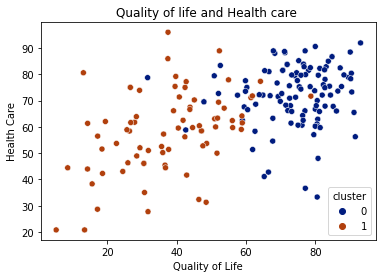

In [68]:
sns.scatterplot(data=dfc,x="Quality of Life",y="Health Care",hue="cluster",palette="dark")
plt.title("Quality of life and Health care ")
plt.show()

In [ ]:
#Here cluster 0 is the one with high quality of life and better healt care
#so if we go by these features then labelling can be cluster0:Best livable place ,cluster1:Not good for living

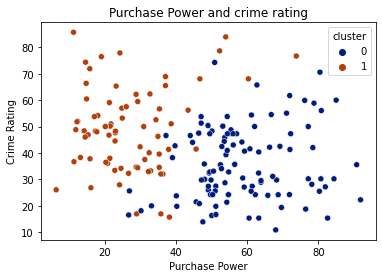

In [76]:
sns.scatterplot(data=dfc,x="Purchase Power",y="Crime Rating",hue="cluster",palette="dark")
plt.title("Purchase Power and crime rating")
plt.show()

In [ ]:
#here cluster0-cities with high purchase power 
#cluster1-cities with low purchase power
#coming to crime rate it is spread in both spreads equally
#now lets go for all numeric featured to visualize clusters wrt features

In [54]:
dfc['cluster'] = labels

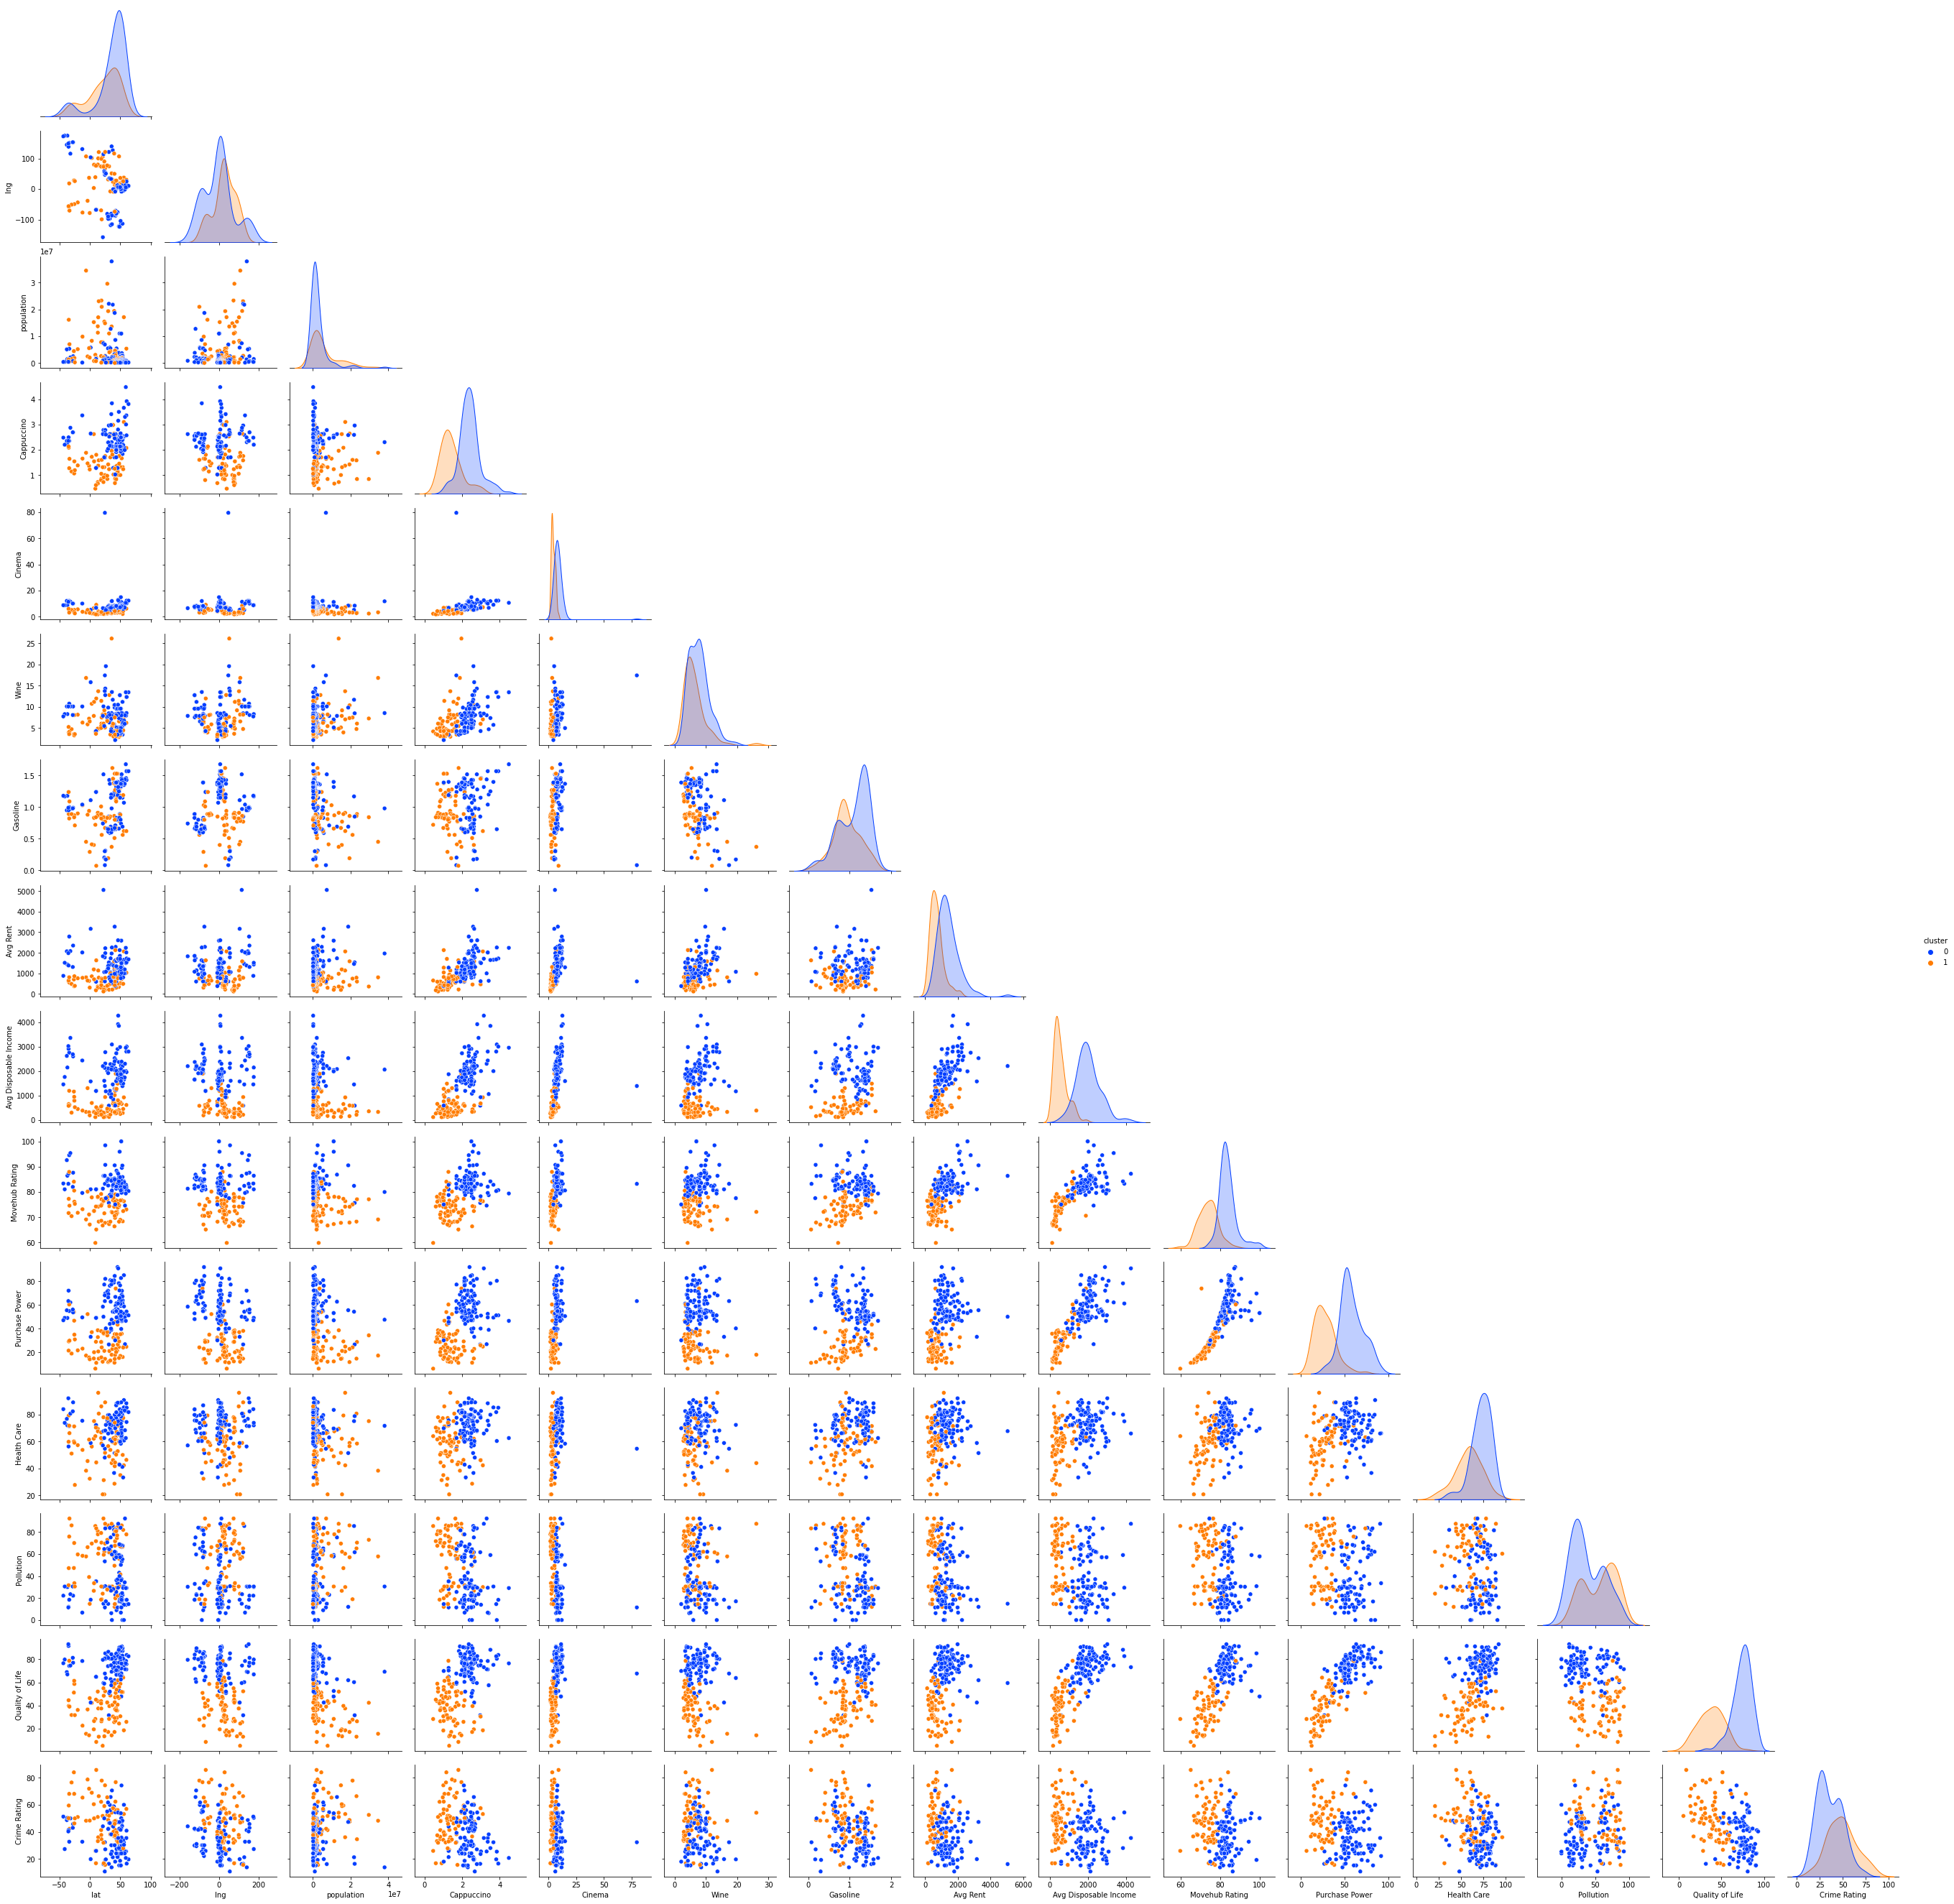

In [56]:
#pair plot for all features to distinguish clusters
sns.set_palette("bright")
sns.pairplot(dfc, hue ="cluster", corner=True)
plt.show()

In [61]:
#printing  cities names wrt clusters
for i in dfc['cluster'].unique():
    print('Cluster Number: ', str(i))
    temp_df = dfc[['City']][dfc['cluster'] == i]
    print(temp_df["City"].unique())
    temp_df["City"].value_counts().plot(kind= 'barh',ax=axs[i])
    print(20* '---')

Cluster Number:  0
['Tokyo' 'Shanghai' 'Seoul' 'New York' 'Los Angeles' 'Paris' 'London'
 'Chicago' 'Hong Kong' 'Riyadh' 'Singapore' 'Dallas' 'Houston' 'Atlanta'
 'Toronto' 'Sydney' 'Melbourne' 'Boston' 'Seattle' 'Berlin' 'Madrid'
 'Birmingham' 'Manchester' 'Brisbane' 'Dubai' 'Vancouver' 'Baltimore'
 'Las Vegas' 'Perth' 'Leeds' 'Hamburg' 'Vienna' 'Orlando' 'Austin'
 'Indianapolis' 'Charlotte' 'Valencia' 'Munich' 'Auckland' 'Muscat'
 'The Hague' 'Adelaide' 'Doha' 'Calgary' 'Dublin' 'Cologne' 'Copenhagen'
 'Nashville' 'Edmonton' 'Amsterdam' 'New Orleans' 'Nice' 'Rotterdam'
 'Abu Dhabi' 'Ottawa' 'Glasgow' 'Stockholm' 'Toulouse' 'Jerusalem'
 'Marseille' 'Liverpool' 'Honolulu' 'Nottingham' 'Bristol' 'Hamilton'
 'Oslo' 'Gold Coast' 'Helsinki' 'Utrecht' 'Stuttgart' 'Gothenburg'
 'Dresden' 'Lyon' 'Leicester' 'Edinburgh' 'Strasbourg' 'Canberra'
 'Wellington' 'Christchurch' 'Victoria' 'Alicante' 'Belfast' 'Nicosia'
 'Newark' 'Haifa' 'Venice' 'Bergen' 'Aachen' 'Limassol' 'Regina'
 'Aberdeen' 'Cor

In [62]:
#importing required libraries for geo visualization
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

<AxesSubplot:>

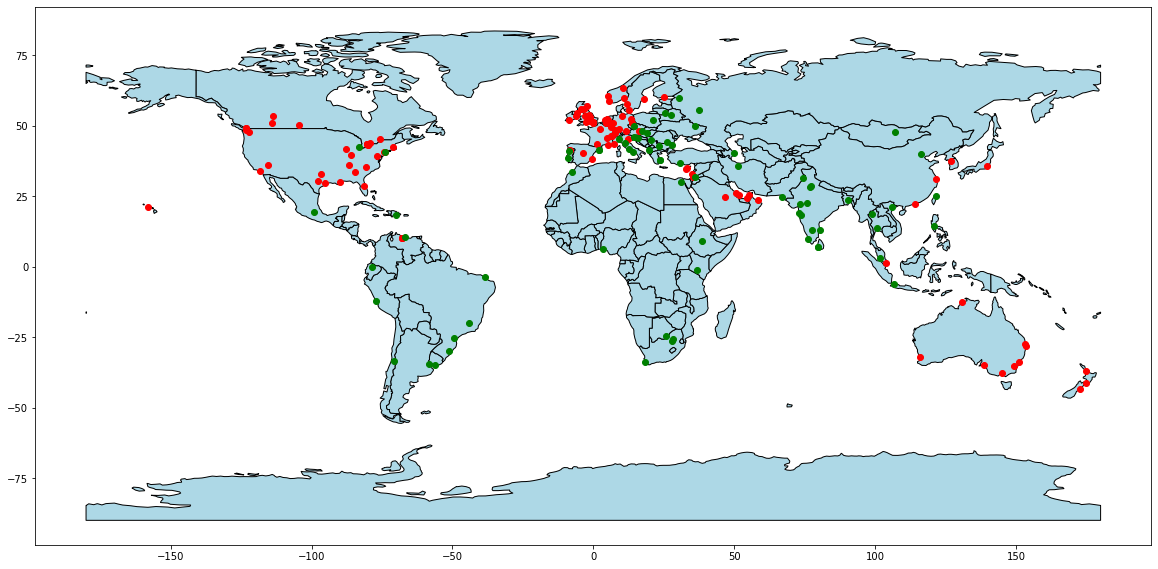

In [63]:
a = dfc[dfc["cluster"]==0]
gdf1 = gpd.GeoDataFrame(a, geometry=gpd.points_from_xy(a.lng, a.lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
axis = world.plot(color = 'lightblue' , edgecolor = 'k', figsize=(20, 10))
gdf1.plot(ax = axis, color='red')

b = dfc[dfc["cluster"]==1]
gdf2 = gpd.GeoDataFrame(b, geometry=gpd.points_from_xy(b.lng, b.lat))
gdf2.plot(ax = axis, color='green')